<a href="https://colab.research.google.com/github/Chandanr77/Deep-Learning/blob/main/Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## ***Lending Club Loan Data Analysis Project 2***

**import the libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan_data.csv')

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**Descriptive statistics**

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
def draw_missing_data_table(df):
 total = df.isnull().sum().sort_values(ascending=False)
 percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
 missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
 return missing_data

draw_missing_data_table(df)

,Total,Percent
not.fully.paid,0,0.0
pub.rec,0,0.0
delinq.2yrs,0,0.0
inq.last.6mths,0,0.0
revol.util,0,0.0
revol.bal,0,0.0
days.with.cr.line,0,0.0
fico,0,0.0
dti,0,0.0
log.annual.inc,0,0.0


In [ ]:
df.shape[0], df.shape[1]

(9578, 14)

In [ ]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

**Feature Engineering**


In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df1 = df.drop(['purpose'],axis =1)
df1.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


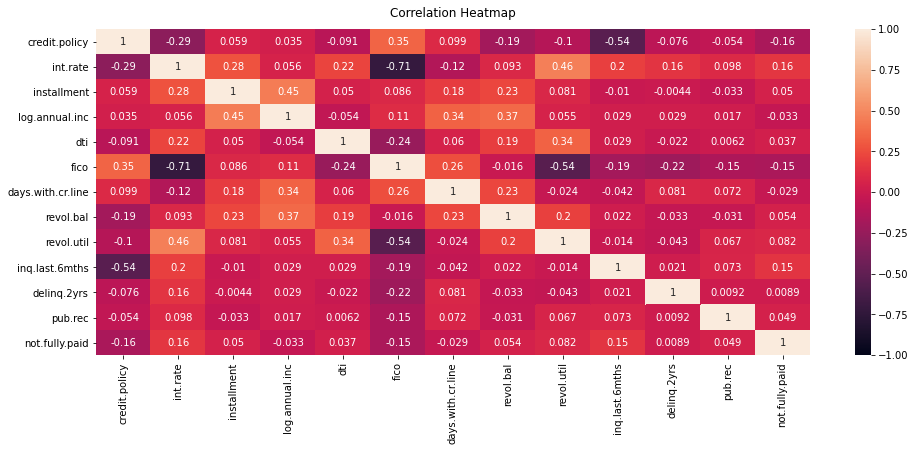

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Feature Transformation**

*Transform categorical values into numerical values (discrete)*

In [ ]:
df1= df.drop('purpose', axis=1)

In [ ]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
X = df1.iloc[:, 1:]
y = df1.iloc[:,0]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)


              feature         VIF
0            int.rate   35.229311
1         installment    4.203935
2      log.annual.inc  377.096058
3                 dti    5.087213
4                fico  278.905611
5   days.with.cr.line    5.246601
6           revol.bal    1.560645
7          revol.util    5.675199
8      inq.last.6mths    1.665182
9         delinq.2yrs    1.200013
10            pub.rec    1.100407
11     not.fully.paid    1.247132


In [ ]:
 X = X.drop(['fico','int.rate','log.annual.inc','dti','revol.util','installment'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

             feature       VIF
0  days.with.cr.line  1.792752
1          revol.bal  1.333792
2     inq.last.6mths  1.402515
3        delinq.2yrs  1.097459
4            pub.rec  1.072438
5     not.fully.paid  1.192166


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df2 = pd.get_dummies(df['purpose'],drop_first=True)
df2.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
X = X.join(df2)
X

,days.with.cr.line,revol.bal,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,5639.958333,28854,0,0,0,0,0,1,0,0,0,0
1,2760.000000,33623,0,0,0,0,1,0,0,0,0,0
2,4710.000000,3511,1,0,0,0,0,1,0,0,0,0
3,2699.958333,33667,1,0,0,0,0,1,0,0,0,0
4,4066.000000,4740,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,10474.000000,215372,2,0,0,1,0,0,0,0,0,0
9574,4380.000000,184,5,0,0,1,0,0,0,0,0,0
9575,3450.041667,10036,8,0,0,1,0,1,0,0,0,0
9576,1800.000000,0,5,0,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
print('Train', X_train.shape, y_train.shape)

Train (6417, 12) (6417,)


In [ ]:
X_train.head()

,days.with.cr.line,revol.bal,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
4939,3990.000000,23075,0,0,0,1,0,1,0,0,0,0
1155,2610.000000,1487,0,0,0,1,0,0,0,0,1,0
1794,4620.041667,3469,1,0,1,1,0,1,0,0,0,0
6332,1710.041667,7786,0,0,0,0,0,0,0,0,0,1
2742,2189.958333,6191,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn import preprocessing
norm = preprocessing.MinMaxScaler()
X_train_nm = norm.fit_transform(X_train)
X_test_nm = norm.transform(X_test)

In [ ]:
print('Test', X_test_nm.shape, y_test.shape)

Test (3161, 12) (3161,)


In [ ]:
X_train_nm

array([[0.21851155, 0.01911196, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13936477, 0.00123161, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.25464617, 0.00287321, 0.03030303, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49810377, 0.01332081, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23055563, 0.01108287, 0.03030303, ..., 0.        , 0.        ,
        1.        ],
       [0.09967906, 0.005898  , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Model Fitting

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
 #Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['Recall','accuracy'])

In [ ]:
#Train Model
model.fit(X_train,y_train,
 validation_data=(X_test,y_test),
 epochs=10,
 batch_size=10)


Epoch 1/10
642/642 [==============================] - 4s 4ms/step - loss: 0.5768 - recall: 0.7754 - accuracy: 0.7225 - val_loss: 0.3661 - val_recall: 0.9344 - val_accuracy: 0.8345
Epoch 2/10
642/642 [==============================] - 2s 2ms/step - loss: 0.4014 - recall: 0.9471 - accuracy: 0.8300 - val_loss: 0.3311 - val_recall: 0.9542 - val_accuracy: 0.8605
Epoch 3/10
642/642 [==============================] - 2s 2ms/step - loss: 0.3782 - recall: 0.9446 - accuracy: 0.8409 - val_loss: 0.3162 - val_recall: 0.9717 - val_accuracy: 0.8668
Epoch 4/10
642/642 [==============================] - 2s 2ms/step - loss: 0.3597 - recall: 0.9514 - accuracy: 0.8479 - val_loss: 0.3071 - val_recall: 0.9736 - val_accuracy: 0.8747
Epoch 5/10
642/642 [==============================] - 1s 2ms/step - loss: 0.3674 - recall: 0.9567 - accuracy: 0.8529 - val_loss: 0.2984 - val_recall: 0.9775 - val_accuracy: 0.8792
Epoch 6/10
642/642 [==============================] - 1s 2ms/step - loss: 0.3749 - recall: 0.9505 - 

Save Model

In [ ]:
model.save('loan_model.h5')

In [ ]:
model.predict(X_test_nm)

array([[0.84572303],
       [0.8552667 ],
       [0.6077448 ],
       ...,
       [0.63745093],
       [0.82279885],
       [0.8492489 ]], dtype=float32)

In [ ]:
df3 = pd.DataFrame()
df3['Actual'] = y_test
#df['credit.policy']
df3['Proba'] = model.predict(X_test)
df3['Pred'] = df3['Proba'].apply(lambda x: 1 if x>0.7 else 0)
df3.head(5)

,Actual,Proba,Pred
8261,0,0.705312,1
3431,1,0.877191,1
5482,1,0.218740,0
3272,1,0.749444,1
4687,1,0.965279,1


In [ ]:
df3.tail(5)

,Actual,Proba,Pred
6159,1,0.951083,1
3908,1,0.933699,1
7879,0,0.065192,0
1089,1,0.953364,1
5267,1,0.962350,1


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
y_pred = df3['Pred']

In [ ]:
accuracy_score(y_test, y_pred)

0.8794685226194242

In [ ]:
recall_score(y_test, y_pred, average=None)

array([0.6010274 , 0.94256888])

In [ ]:
precision_score(y_test, y_pred, average=None)

array([0.70340681, 0.91247183])

In [ ]:
f1_score(y_test, y_pred)

0.9272761977476618

In [ ]:
 cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 351  233]
 [ 148 2429]]


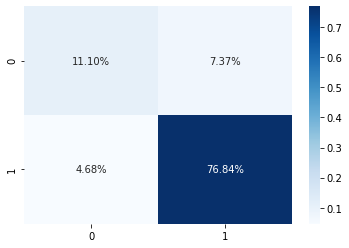

In [ ]:
 sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
 fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       584
           1       0.91      0.94      0.93      2577

    accuracy                           0.88      3161
   macro avg       0.81      0.77      0.79      3161
weighted avg       0.87      0.88      0.88      3161



In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

1    5133
0    1284
Name: credit.policy, dtype: int64

In [ ]:
smt = SMOTE(random_state=42)
X_smote, y_smote = smt.fit_sample(X_train, y_train)

In [ ]:
np.bincount(y_smote)

array([5133, 5133])

In [ ]:
model.fit(X_smote, y_smote)

321/321 [==============================] - 1s 2ms/step - loss: 0.5613 - recall: 0.9657 - accuracy: 0.7244


In [ ]:
model.fit(X_smote,y_smote,
 validation_data=(X_test,y_test),
 epochs=10,
 batch_size=50)

Epoch 1/10
206/206 [==============================] - 1s 3ms/step - loss: 0.4256 - recall: 0.9184 - accuracy: 0.8099 - val_loss: 0.3388 - val_recall: 0.9193 - val_accuracy: 0.8782
Epoch 2/10
206/206 [==============================] - 1s 3ms/step - loss: 0.4096 - recall: 0.8841 - accuracy: 0.8170 - val_loss: 0.3477 - val_recall: 0.9061 - val_accuracy: 0.8709
Epoch 3/10
206/206 [==============================] - 1s 3ms/step - loss: 0.3960 - recall: 0.8693 - accuracy: 0.8257 - val_loss: 0.3526 - val_recall: 0.8956 - val_accuracy: 0.8665
Epoch 4/10
206/206 [==============================] - 1s 3ms/step - loss: 0.3848 - recall: 0.8724 - accuracy: 0.8331 - val_loss: 0.3501 - val_recall: 0.8960 - val_accuracy: 0.8693
Epoch 5/10
206/206 [==============================] - 1s 3ms/step - loss: 0.3870 - recall: 0.8650 - accuracy: 0.8326 - val_loss: 0.3526 - val_recall: 0.8894 - val_accuracy: 0.8655
Epoch 6/10
206/206 [==============================] - 1s 3ms/step - loss: 0.3857 - recall: 0.8554 - 

In [ ]:
df3 = pd.DataFrame()
df3['Actual'] = y_test
#df['credit.policy']
df3['Proba'] = model.predict(X_test)
df3['Pred'] = df3['Proba'].apply(lambda x: 1 if x>0.7 else 0)
y_pred = df3['Pred']
df3.head(5)

,Actual,Proba,Pred
8261,0,0.262877,0
3431,1,0.481127,0
5482,1,0.050154,0
3272,1,0.379442,0
4687,1,0.916972,1


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 504   80]
 [ 617 1960]]
